In [7]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos


df = pd.read_csv("asistencia_artes_escenicas2025.csv")

df.shape
df.info()
df.isna().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  11 non-null     object 
 1   2010-2011  11 non-null     float64
 2   2014-2015  11 non-null     float64
 3   2018-2019  11 non-null     float64
 4   2021-2022  11 non-null     float64
 5   2024-2025  11 non-null     float64
dtypes: float64(5), object(1)
memory usage: 660.0+ bytes


Categoria    11
2010-2011    11
2014-2015    10
2018-2019    11
2021-2022    11
2024-2025    11
dtype: int64

In [8]:
df.head()

,Categoria,2010-2011,2014-2015,2018-2019,2021-2022,2024-2025
0,TOTAL,27.8,29.9,30.8,10.5,30.0
1,Hombres,25.0,26.8,27.8,9.7,26.6
2,Mujeres,30.5,32.9,33.7,11.3,33.2
3,15–24 años,31.2,35.3,38.1,12.1,30.5
4,25–34 años,33.3,32.4,34.5,12.5,31.2



--- Estadísticas descriptivas numéricas ---


,2010-2011,2014-2015,2018-2019,2021-2022,2024-2025,Cambio_2010_2025
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,29.563636,31.827273,33.100000,10.990909,30.709091,1.145455
std,7.508698,8.178520,7.745579,2.646301,6.691854,3.335075
min,17.500000,18.100000,19.400000,6.400000,18.300000,-4.700000
25%,26.400000,28.350000,29.300000,9.800000,27.450000,-0.700000
50%,30.500000,32.900000,33.700000,11.300000,30.500000,1.600000
75%,33.150000,34.750000,37.600000,12.300000,33.650000,2.450000
max,43.300000,49.200000,47.000000,16.400000,45.100000,8.000000


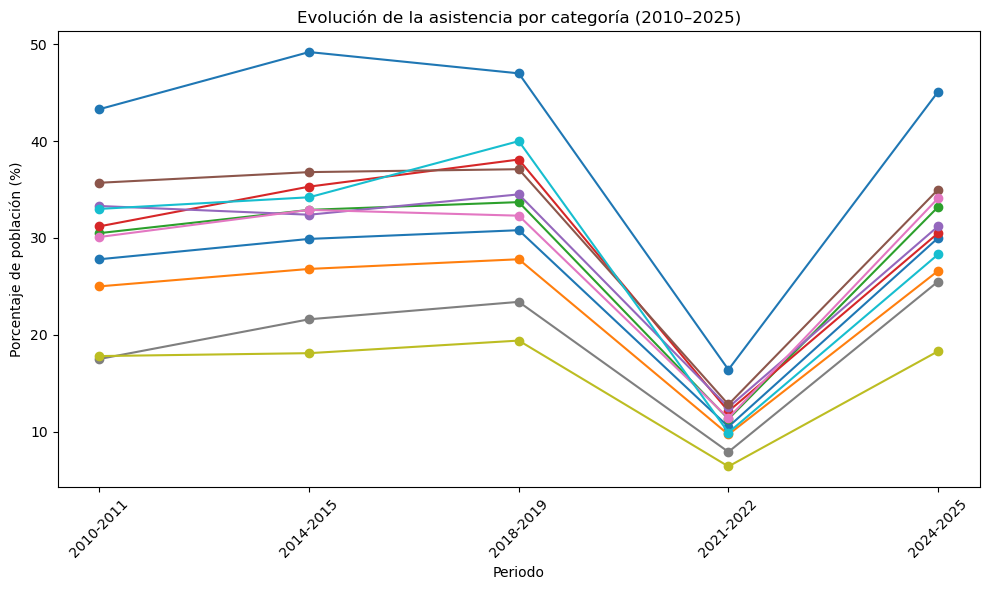

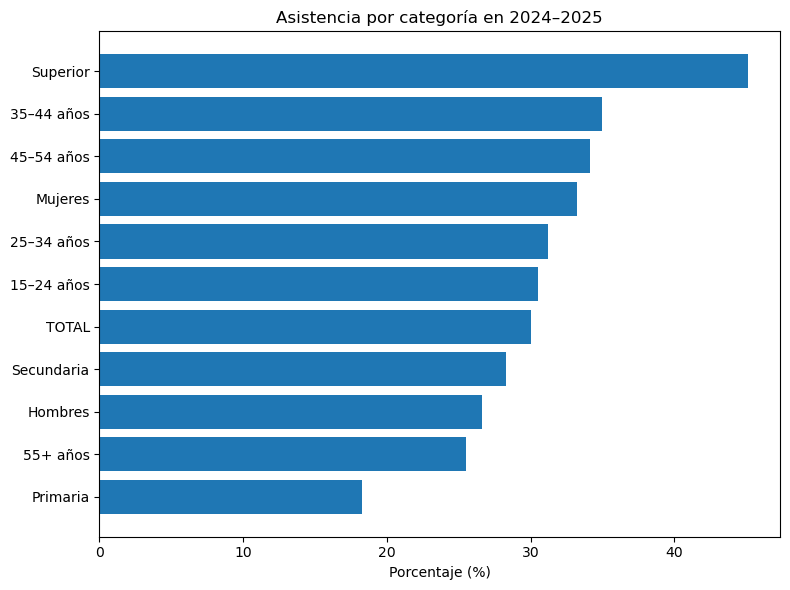

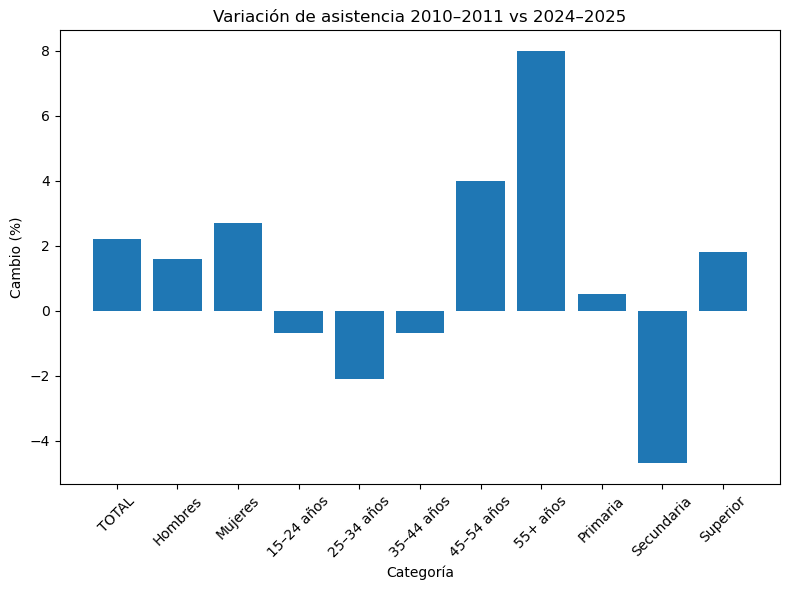

,Categoria,Cambio_2010_2025
7,55+ años,8.0
6,45–54 años,4.0
2,Mujeres,2.7
0,TOTAL,2.2
10,Superior,1.8
1,Hombres,1.6
8,Primaria,0.5
3,15–24 años,-0.7
5,35–44 años,-0.7
4,25–34 años,-2.1



CSV limpio guardado como 'asistencia_artes_escenicas_2010_2025_limpio.csv'


In [11]:
# 1. Estadística descriptiva
# ================================

print("\n--- Estadísticas descriptivas numéricas ---")
display(df.describe())

# ================================
# 2. Evolución temporal por categoría
# ================================

periodos = ["2010-2011", "2014-2015", "2018-2019", "2021-2022", "2024-2025"]

plt.figure(figsize=(10,6))
for i, row in df.iterrows():
    plt.plot(periodos, row[periodos], marker='o')

plt.title("Evolución de la asistencia por categoría (2010–2025)")
plt.xlabel("Periodo")
plt.ylabel("Porcentaje de población (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 3. Comparativa del último periodo (2024–2025)
# ================================

df_sorted = df[["Categoria", "2024-2025"]].sort_values("2024-2025", ascending=False)

plt.figure(figsize=(8,6))
plt.barh(df_sorted["Categoria"], df_sorted["2024-2025"])
plt.title("Asistencia por categoría en 2024–2025")
plt.xlabel("Porcentaje (%)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ================================
# 4. Variación entre el primer y el último periodo
# ================================

df["Cambio_2010_2025"] = df["2024-2025"] - df["2010-2011"]

plt.figure(figsize=(8,6))
plt.bar(df["Categoria"], df["Cambio_2010_2025"])
plt.title("Variación de asistencia 2010–2011 vs 2024–2025")
plt.xlabel("Categoría")
plt.ylabel("Cambio (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 5. Ranking global por crecimiento
# ================================

ranking = df[["Categoria", "Cambio_2010_2025"]].sort_values("Cambio_2010_2025", ascending=False)
display(ranking)

# ================================
# 6. Guardar CSV limpio
# ================================

df.to_csv("asistencia_artes_escenicas_2010_2025_limpio.csv", index=False)
print("\nCSV limpio guardado como 'asistencia_artes_escenicas_2010_2025_limpio.csv'")

CONCLUSIONES TÉCNICAS – Asistencia Artes Escénicas 2010–2025

(Archivo: asistencia_artes_escenicas_2010_2025)

– El dataset cubre 11 categorías (sexo, edad y nivel educativo) con cinco cohortes temporales: 2010-11, 2014-15, 2018-19, 2021-22 y 2024-25.
– La evolución muestra recuperación transversal en casi todas las categorías en la última ventana (2024-25) frente a 2021-22.
– El mayor crecimiento porcentual se concentra en 55+ años, seguido de 45-54 años, lo que evidencia un impulso del público adulto.
– Las mujeres crecen más que los hombres, consolidando una brecha favorable hacia el público femenino.
– Los niveles educativos “Superior” mantienen crecimiento moderado; Secundaria es la única categoría con caída notable en la última ventana.
– La categoría TOTAL presenta un incremento del +2,2%, validando una recuperación general del sector.